### The Aliased Whistle Demo

In this demo, we get a more practical feel for aliasing as we recreate a scenario where aliasing occurs and hear the resulting effect.


Firstly let us import several of the packages we will need. If these packages are not available on your machine, you will have to install them first. 

In [1]:
import numpy as np 
from scipy import signal
import sounddevice as sd
from matplotlib import pyplot as plt
import IPython
from IPython.display import Audio, Image
%matplotlib notebook

One thing we need to pay attention to when sampling signals is that we satisfy the **Nyquist-Shannon sampling theroem**, i.e. the sampling frequency, $f_{s}$ must be greater than or equal to twice the bandwidth, $B$ of the signal you are attempting to sample, i.e. $f_{s} \geq 2B$. Let's see this in action.

How about we record a whistle? According to the Guiness World Records, the highest pitched whistle to be recorded was 10,599 Hz! (https://en.wikipedia.org/wiki/Whistling). I think we can safely say that if we set our sampling frequency to 24 kHz, we will satisfy the Nyquist Sampling Theroem. After executing the following cell, try to make a continuous whistle that increases in frequency (maybe you will have to practice a bit first :) )

In [6]:
duration = 3  # seconds
fs = 24000    # Sampling frequency (Hz)
print ('recording...')
whistle = sd.rec(duration * fs, blocking=True,samplerate=fs, channels=1)
print ('recording completed')

recording...
recording completed


Let's take a look at the data. We will also view a [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of the data to observe the time-frequency content.

Data shape:  (72000, 1)
Whistle sampled at 24 kHz:


<IPython.core.display.Javascript object>


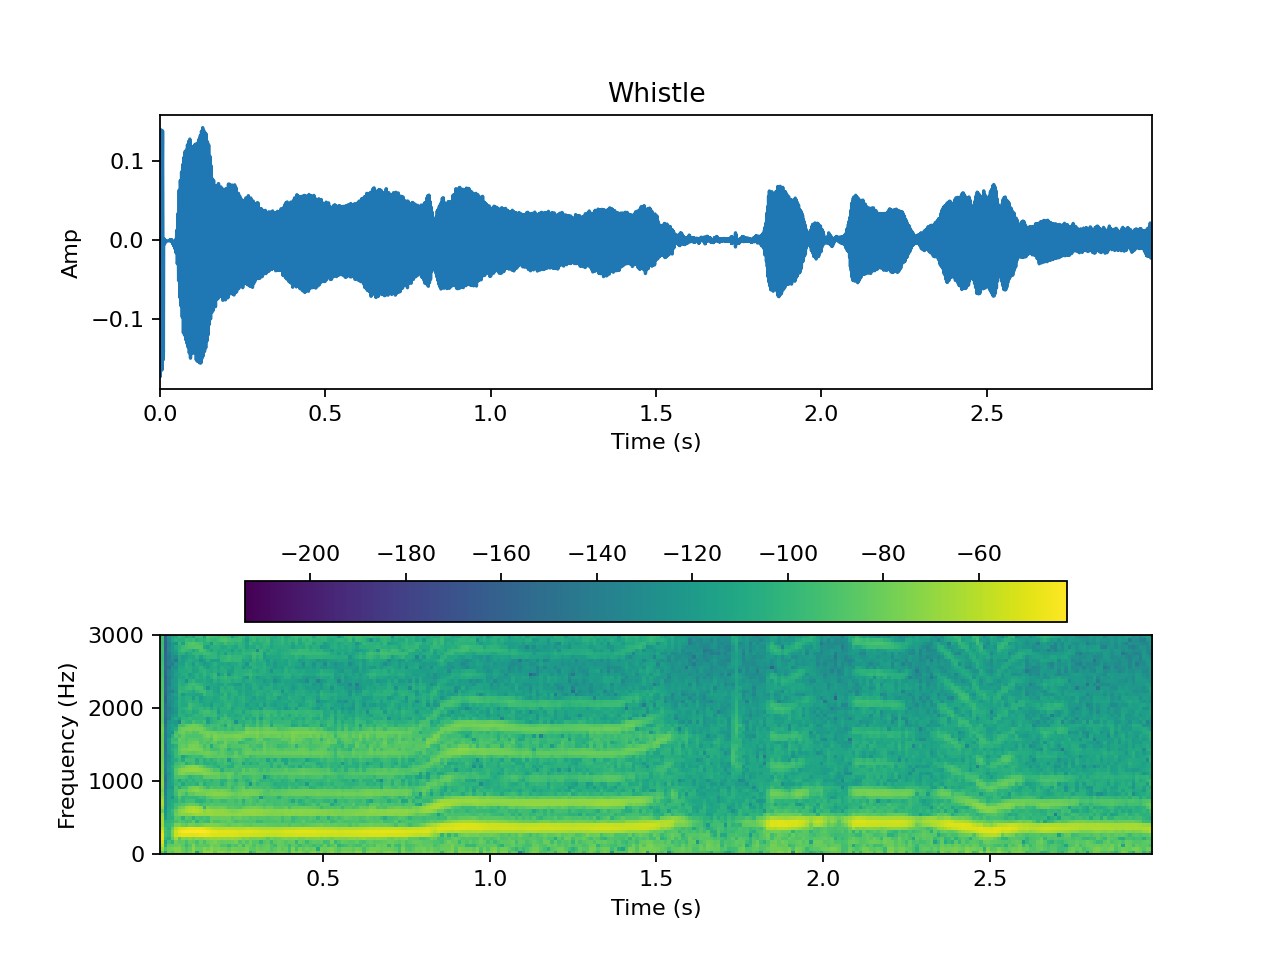

In [7]:
print("Data shape: ", whistle.shape)
print("Whistle sampled at 24 kHz:")
IPython.display.display(Audio(whistle.T, rate=fs))

# Creating the time vector
dt = 1/fs           
N = len(whistle) 
time = np.arange(0,N*dt,dt)  


fig, axes = plt.subplots(2, 1, figsize=(8, 6)) 
fig.subplots_adjust(hspace=0.7) # spacing between figures

axes[0].plot(time,whistle)
axes[0].set_title('Whistle')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amp')
axes[0].set_xlim(time[0],time[-1])

# Computing the spectrogram. We use the package signal which has a spectrogram function
nfft = 512         # number of points for the FFT 
noverlap = nfft/2  # Spectrogram overlap (make it 50 %)

# Compute the spectrogram. We set the mode to obtain the magnitude, 
# i.e absolute magnitude of the short-time Fourier transform (STFT) coefficients.
# Note that we are not concerned with the exact magnitude, i.e. sound pressure level of the signal
f_sg, t_sg, Z_mag = signal.spectrogram(whistle[:,0], fs=fs,nperseg=nfft,window='hann',mode='magnitude',noverlap=noverlap)
Z_dB = 10*np.log10(Z_mag**2) # convert the magnitude to dB


# This is just some extra parameters for the imshow function, which allows you to plot a spectrogram
# The extent parameter is defining the corners of the image
extent = t_sg[0], t_sg[-1], f_sg[0], f_sg[-1]  # this defines the 4 corners of the "image"

sp = axes[1].imshow(Z_dB, origin='lower',aspect='auto',extent=extent)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_ylim(0,3000)   # Adjust this range if your whistle goes higher!
cb = plt.colorbar(sp,ax=[axes[1]],location='top')


Okay so I did not do too bad! (I did have a few practice tries). What you see in the spectrogram is the brightest area corresponding to the highest acoustic pressures recorded and corresponds to the whistle. You can also see that over time, the frequency of the whistle is increasing (there is even some harmonic content!). The key point to take away here is that the sound of the whistle that you recorded (i.e. the one you can listen to above) sounds just like the sound you produced. Apart from the signal quality, the frequency content of the whistle has been captured accurately. This is because the maximum frequency I could have produced in my whistle was close to 2 kHz (hence the effective bandwidth, $B = 2$ kHz) and $f_{s} = 24$ kHz, hence the Nyquist-Shannon sampling theroem has been satisfied.


So now let's try to delibrately violate the Nyquist-Shannon sampling theroem. After executing the cell record (roughly) the same pitched whistle as before, but now let's acquire the signal with a much lower sampling frequency.

In [30]:
duration = 3  # seconds
fs = 3000    # Sampling frequency (Hz)
print ('recording...')
whistle = sd.rec(duration * fs, blocking=True,samplerate=fs, channels=1)
print ('finished recording')


recording...
finished recording


Data shape:  (9000, 1)
Whistle sampled at 3 kHz:


<IPython.core.display.Javascript object>


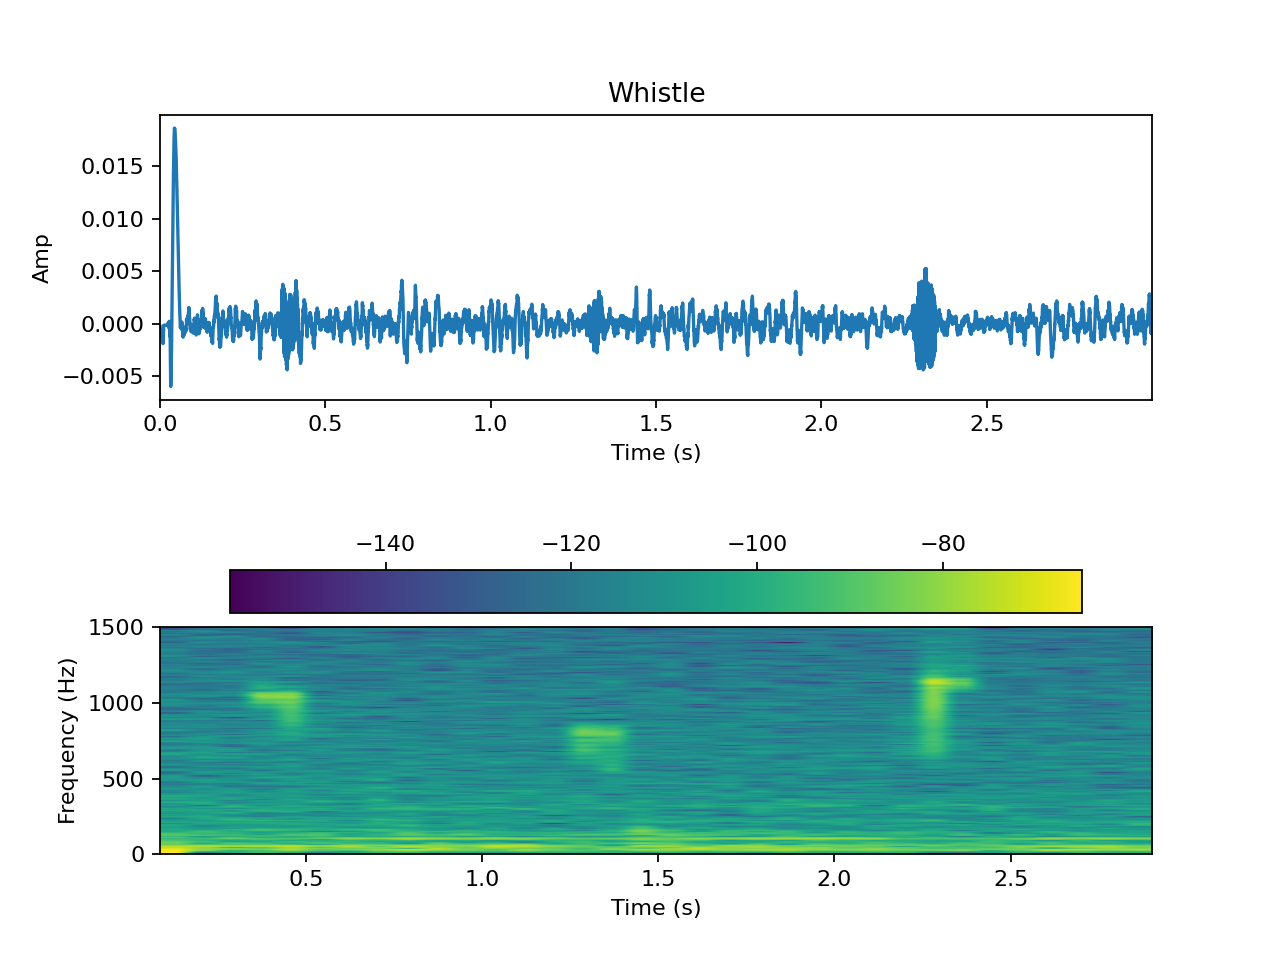

In [31]:
print("Data shape: ", whistle.shape)
print("Whistle sampled at 3 kHz:")
IPython.display.display(Audio(whistle.T, rate=fs))

# Need to redefine the time vector since we use a different fs!
dt = 1/fs           
N = len(whistle) 
time = np.arange(0,N*dt,dt)  


fig, axes = plt.subplots(2, 1, figsize=(8, 6)) 
fig.subplots_adjust(hspace=0.6) # spacing between figures

axes[0].plot(time,whistle)
axes[0].set_title('Whistle')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amp')
axes[0].set_xlim(time[0],time[-1])

# Computing the spectrogram. We use the package signal which has a spectrogram function
nfft = 512         # number of points for the FFT 
noverlap = nfft/2  # Spectrogram overlap (make it 50 %)

# Compute the spectrogram. We set the mode to obtain the magnitude, 
# i.e absolute magnitude of the short-time Fourier transform (STFT) coefficients.
# Note that we are not concerned with the exact magnitude, i.e. sound pressure level of the signal
f_sg, t_sg, Z_mag = signal.spectrogram(whistle[:,0], fs=fs,nperseg=nfft,window='hann',mode='magnitude',noverlap=noverlap)
Z_dB = 10*np.log10(Z_mag**2) # convert the magnitude to dB


# This is just some extra parameters for the imshow function, which allows you to plot a spectrogram
# The extent parameter is defining the corners of the image
extent = t_sg[0], t_sg[-1], f_sg[0], f_sg[-1]  # this defines the 4 corners of the "image"

sp = axes[1].imshow(Z_dB, origin='lower',aspect='auto',extent=extent)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')
cb = plt.colorbar(sp,ax=[axes[1]],location='top')

Now you will only really have an appreciation for what just happened if you did the demo yourself. I did infact try to whistle just as before with an increasing frequency, but now however $f_{s} = 3$ kHz. If I assume that the bandwidth of my whistle was still $2$ kHz, i.e. $B = 2$ kHz, then I indeed violated the Nyquist-Shannon sampling thereom. The result is that whereas I produced a whistle going up in frequency, what was recorded was a whistle that goes up in frequency and then goes back down. This is clearly seen in the spectrogram and we can think of the signal as 'bouncing' off the Nyquist frequency ($f_{s}/2$). Recall from the theoretical section that the aliased frequency that ends up in the spectrum = $f_{s} - B$. So for instance, if the end of our original whistle was a $2$ kHz, then the aliased frequency should be = $3$ kHz - $2$ kHz = $1$ kHz, which is what is seen on the spectrogram. 


So the take away is that if you sampled at too low of a sampling frequency, the signal content that you think might be there is actually not true, but an artifact created by aliasing! So we need to be careful! How? In many cases, it is important to do some investigation into the source signals you are recording, e.g. speech, animal vocalisations are well documented and bandwidths for such signals are known, which can help us decide on our sampling frequency to avoid aliasing.  